입력 영상 크기: (112, 92)
데이터셋 X의 크기: (50, 10304)
변환 행렬 U의 크기: (10304, 40)
특징 벡터 y의 크기: (40,)
특징 벡터 y (처음 5개 값): [56.286556  -2.0085526  0.3829515 -1.5287358  1.2897644]


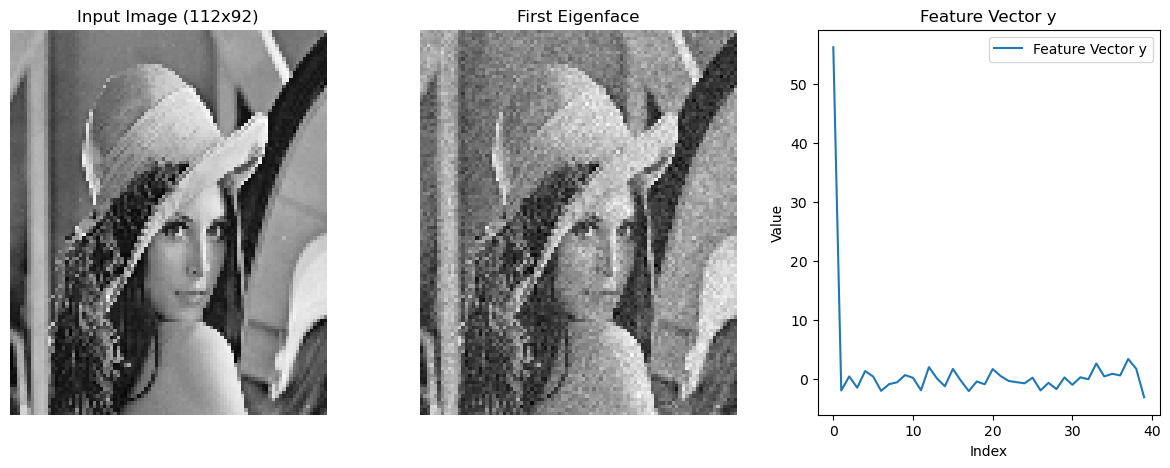

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA as SklearnPCA

# 1. Lena 이미지 로드 (OpenCV 사용)
image_path = './image/lena.bmp'  # Lena 이미지 경로로 변경
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 제대로 로드되었는지 확인
if image is None:
    print("이미지를 로드할 수 없습니다. 경로를 확인하세요.")
    exit()

# 2. 이미지 크기 조정 (112x92로 맞춤)
M, N = 112, 92
image = cv2.resize(image, (N, M))  # (M, N) 크기로 리사이즈
image = image.astype(np.float32)

# 3. 데이터셋 준비 (Lena 이미지를 변형해 여러 이미지 생성)
num_images = 50  # 샘플 수 증가
X = np.zeros((num_images, M * N), dtype=np.float32)

# Lena 이미지를 변형해 데이터셋 생성
for i in range(num_images):
    # 밝기 조정, 노이즈 추가 등으로 변형
    factor = 0.8 + 0.4 * (i / num_images)  # 밝기 조정
    noise = np.random.randn(M, N) * 10  # 노이즈 추가
    img_variant = image * factor + noise
    img_variant = np.clip(img_variant, 0, 255)  # 값 범위 제한
    X[i] = img_variant.ravel()

# 4. PCA 수행 (scikit-learn 사용)
target_d = 40
pca = SklearnPCA(n_components=target_d, svd_solver='auto')  # svd_solver를 'auto'로 설정
X_transformed = pca.fit_transform(X)
U = pca.components_.T  # (M*N, target_d)
x_bar = pca.mean_  # (M*N,)

# 5. 고유 얼굴로 특징 벡터 y 계산 (알고리즘 6-5)
x = image.ravel()  # 원본 Lena 이미지를 벡터로 변환
x_prime = x - x_bar
y = U.T @ x_prime

# 6. 결과 출력
print(f"입력 영상 크기: {image.shape}")
print(f"데이터셋 X의 크기: {X.shape}")
print(f"변환 행렬 U의 크기: {U.shape}")
print(f"특징 벡터 y의 크기: {y.shape}")
print(f"특징 벡터 y (처음 5개 값): {y[:5]}")

# 7. 시각화
plt.figure(figsize=(15, 5))

# 원본 영상
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title(f'Input Image ({M}x{N})')
plt.axis('off')

# 첫 번째 고유 얼굴 (정규화 후 시각화)
eigenface = U[:, 0].reshape(M, N)
eigenface = (eigenface - eigenface.min()) / (eigenface.max() - eigenface.min())  # 정규화
plt.subplot(1, 3, 2)
plt.imshow(eigenface, cmap='gray')
plt.title('First Eigenface')
plt.axis('off')

# 특징 벡터 y
plt.subplot(1, 3, 3)
plt.plot(y, label='Feature Vector y')
plt.title('Feature Vector y')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()